In [1]:
import pandas as pd
import numpy as np
import datetime

# Generate synthetic data
np.random.seed(42)
date_range = pd.date_range(start='2000-01-01', periods=100, freq='M')
temperature = np.random.normal(loc=0, scale=0.5, size=len(date_range)).cumsum()

# Create DataFrame
temperature_data = pd.DataFrame({'Date': date_range, 'Temperature': temperature})

# Display the first few rows of the dataset
print(temperature_data.head())

        Date  Temperature
0 2000-01-31     0.248357
1 2000-02-29     0.179225
2 2000-03-31     0.503069
3 2000-04-30     1.264584
4 2000-05-31     1.147507


1)EDA

                      Date  Temperature
count                  100   100.000000
mean   2004-03-15 18:28:48    -3.202591
min    2000-01-31 00:00:00    -6.123328
25%    2002-02-21 00:00:00    -4.933754
50%    2004-03-15 12:00:00    -4.136067
75%    2006-04-07 12:00:00    -2.029985
max    2008-04-30 00:00:00     2.240306
std                    NaN     2.321999


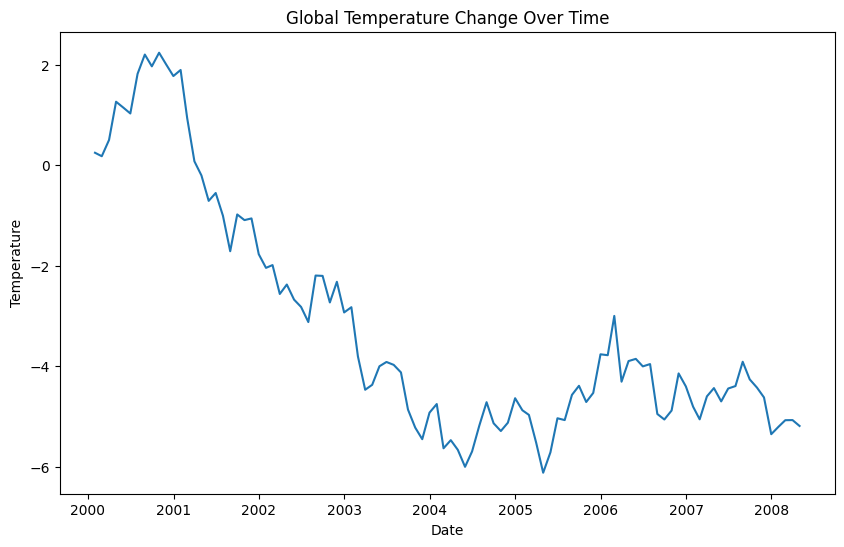

In [2]:
# Basic statistics
print(temperature_data.describe())

# Plot the temperature over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(temperature_data['Date'], temperature_data['Temperature'])
plt.title('Global Temperature Change Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

2) Time Series Analysis

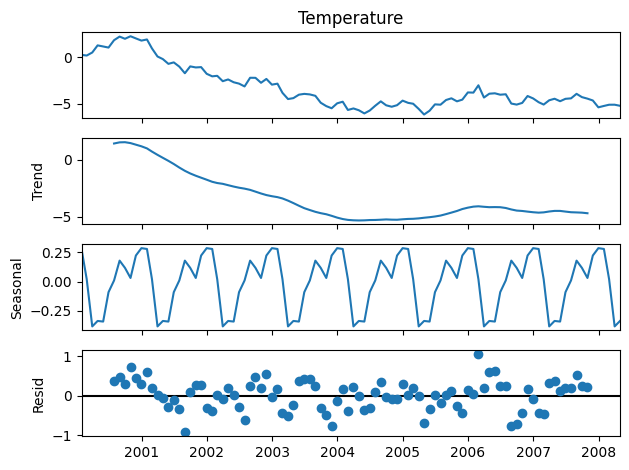

In [4]:
# Convert Date to index
temperature_data.set_index('Date', inplace=True)

# Decompose time series
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(temperature_data['Temperature'], model='additive')
result.plot()
plt.show()

3) Regression based Time Series Analysis:

In [5]:
# Create lag features
for i in range(1, 13):
    temperature_data[f'Lag_{i}'] = temperature_data['Temperature'].shift(i)

# Drop NaN rows
temperature_data.dropna(inplace=True)

# Train-test splitp
train_size = int(0.8 * len(temperature_data))
train_data, test_data = temperature_data[:train_size], temperature_data[train_size:]

# Train a linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X_train = train_data.drop('Temperature', axis=1)
y_train = train_data['Temperature']
model.fit(X_train, y_train)

# Evaluate the model on the test set
X_test = test_data.drop('Temperature', axis=1)
y_test = test_data['Temperature']
predictions = model.predict(X_test)

# Calculate MAE
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.24497073955641188


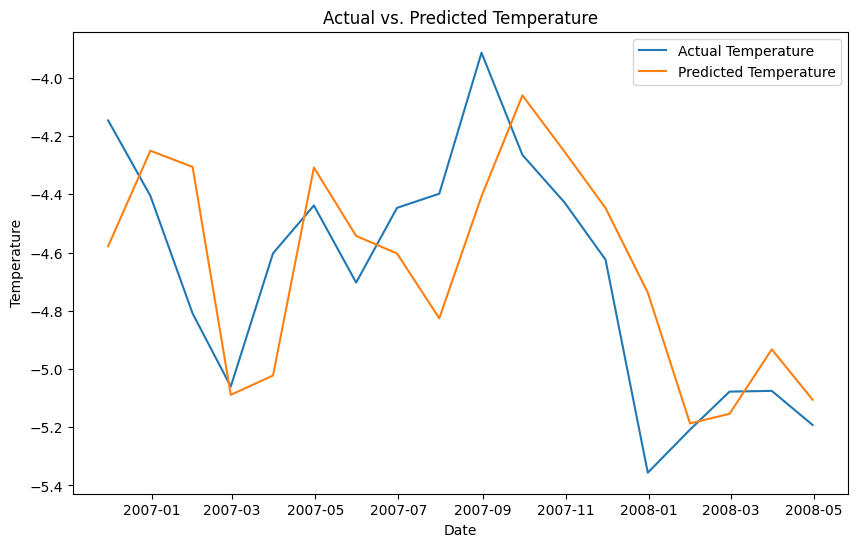

In [7]:
# Plot actual vs. predicted temperature on the test set
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, y_test, label='Actual Temperature')
plt.plot(test_data.index, predictions, label='Predicted Temperature')
plt.title('Actual vs. Predicted Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

4) Making Regression Predictions with Future Temperature Rise:

In [6]:
# Predict future temperature using the trained model
future_features = temperature_data.tail(12).drop('Temperature', axis=1)
future_predictions = model.predict(future_features)

# Create a DataFrame with future dates
future_dates = pd.date_range(start=temperature_data.index[-1], periods=12, freq='M')
future_temperature = pd.DataFrame({'Date': future_dates, 'Predicted_Temperature': future_predictions})
future_temperature.set_index('Date', inplace=True)

# Display the predictions for future temperature rise
print(future_temperature)

            Predicted_Temperature
Date                             
2008-04-30              -4.542781
2008-05-31              -4.603046
2008-06-30              -4.825763
2008-07-31              -4.406693
2008-08-31              -4.060145
2008-09-30              -4.253948
2008-10-31              -4.446814
2008-11-30              -4.737356
2008-12-31              -5.186706
2009-01-31              -5.153732
2009-02-28              -4.932431
2009-03-31              -5.105467


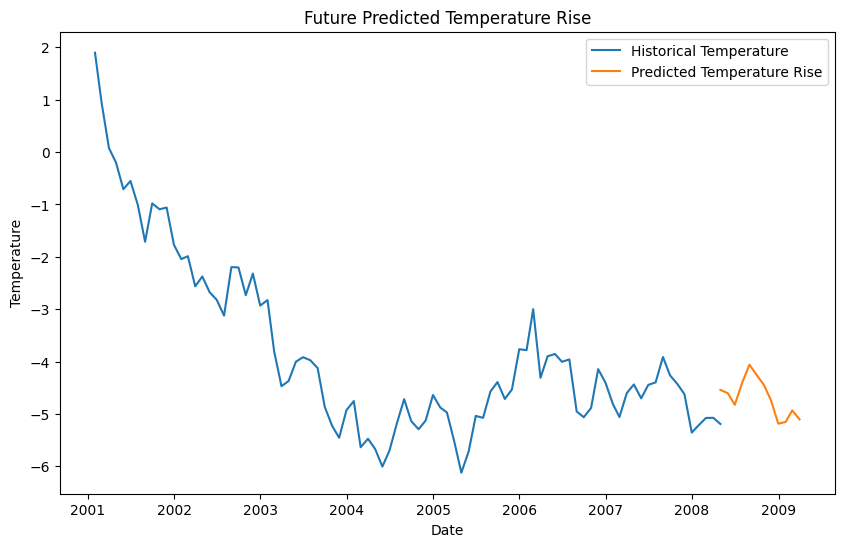

In [8]:
# Plot the future predicted temperature rise
plt.figure(figsize=(10, 6))
plt.plot(temperature_data.index, temperature_data['Temperature'], label='Historical Temperature')
plt.plot(future_temperature.index, future_temperature['Predicted_Temperature'], label='Predicted Temperature Rise')
plt.title('Future Predicted Temperature Rise')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()